In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
df = pd.read_csv("ObesityDataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [47]:
print(df.isnull().sum())
print(df.info())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height             

In [49]:
df.rename(columns={
    'NObeyesdad': 'Obesity Level',
    'FAVC': 'High Caloric Food',
    'FCVC': 'Vegetable Consumption',
    'NCP': 'Number of Meals',
    'CAEC': 'Food Between Meals',
    'CH2O': 'Daily Water Intake',
    'SCC': 'Calorie Consumption Monitor',
    'FAF': 'Physical Activity Frequency',
    'TUE': 'Time Using Technology',
    'CALC': 'Alcohol Consumption',
    'MTRANS': 'Transportation'
}, inplace=True)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,High Caloric Food,Vegetable Consumption,Number of Meals,Food Between Meals,SMOKE,Daily Water Intake,Calorie Consumption Monitor,Physical Activity Frequency,Time Using Technology,Alcohol Consumption,Transportation,Obesity Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


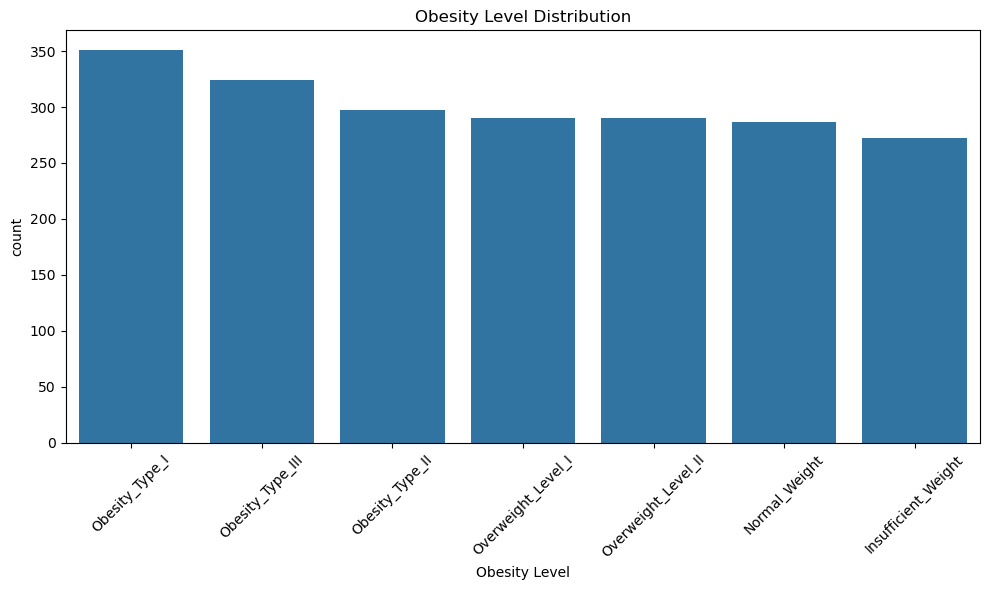

In [51]:
# 1. Class Distribution (Obesity Levels)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Obesity Level', order=df['Obesity Level'].value_counts().index)
plt.title("Obesity Level Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

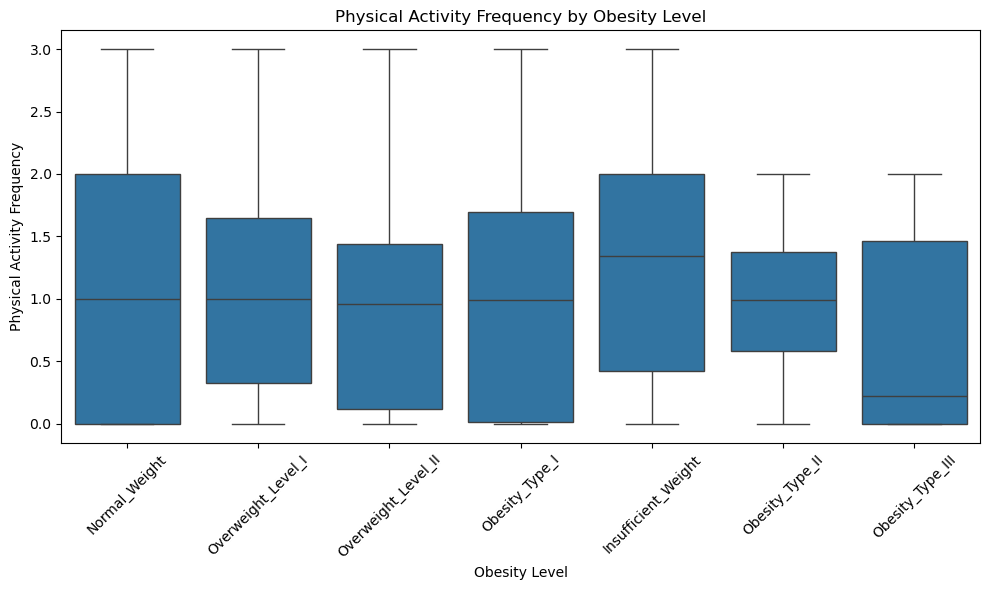

In [52]:
# 2. Physical Activity Frequency vs Obesity Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Obesity Level', y='Physical Activity Frequency')
plt.title("Physical Activity Frequency by Obesity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

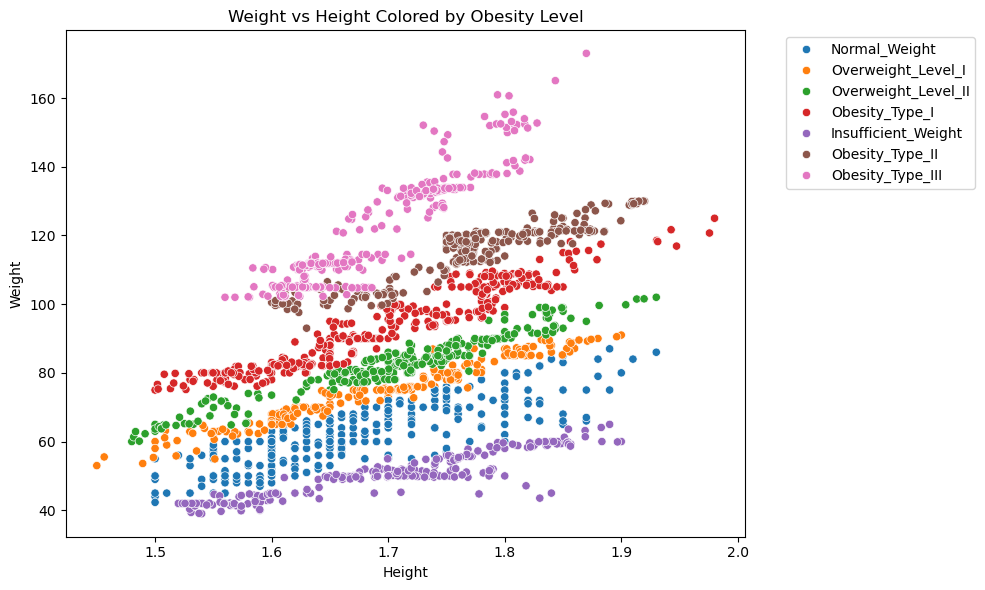

In [53]:
# 3. Scatterplot: Weight vs Height by Obesity Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Obesity Level')
plt.title("Weight vs Height Colored by Obesity Level")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [55]:
# Linear Modeling
# Experiment 1: Predict Weight
X_weight = df[['Physical Activity Frequency', 'Age']]
y_weight = df['Weight']
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_weight, y_weight, test_size=0.3, random_state=42)
model_weight = LinearRegression()
model_weight.fit(X_train_w, y_train_w)
y_pred_w = model_weight.predict(X_test_w)
print("Weight Prediction - Linear Regression")
print("R^2 Score:", r2_score(y_test_w, y_pred_w))
print("MSE:", mean_squared_error(y_test_w, y_pred_w))

Weight Prediction - Linear Regression
R^2 Score: 0.04201899195072778
MSE: 685.1887342178702


In [56]:
# Experiment 2: Predict BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
X_bmi = df[['Physical Activity Frequency', 'Vegetable Consumption', 'Daily Water Intake', 'Time Using Technology']]
y_bmi = df['BMI']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bmi, y_bmi, test_size=0.3, random_state=42)
model_bmi = LinearRegression()
model_bmi.fit(X_train_b, y_train_b)
y_pred_b = model_bmi.predict(X_test_b)
print("\nBMI Prediction - Linear Regression")
print("R^2 Score:", r2_score(y_test_b, y_pred_b))
print("MSE:", mean_squared_error(y_test_b, y_pred_b))


BMI Prediction - Linear Regression
R^2 Score: 0.1296031982517527
MSE: 57.81752301350171


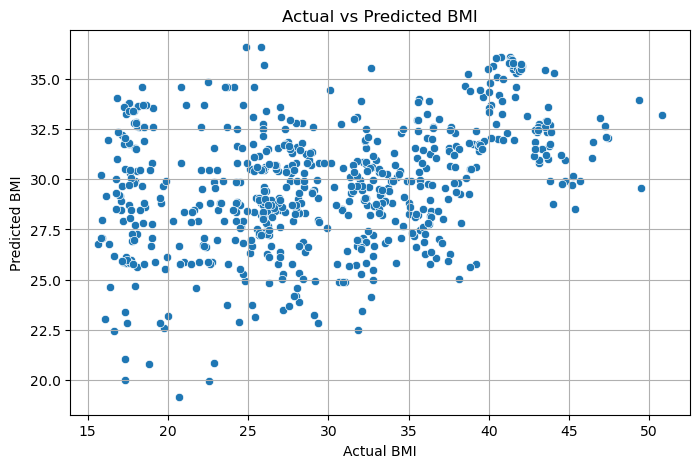

In [57]:
# Predicted vs Actual for BMI
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_b, y=y_pred_b)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Actual vs Predicted BMI')
plt.grid(True)
plt.show()

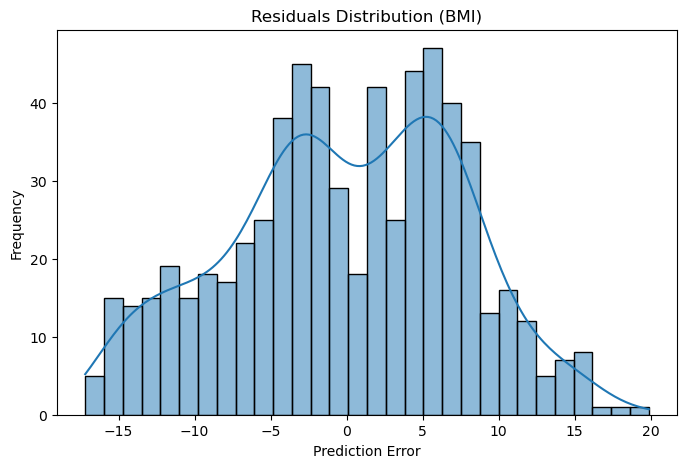

In [59]:
# Residual plot for BMI
residuals = y_test_b - y_pred_b
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (BMI)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

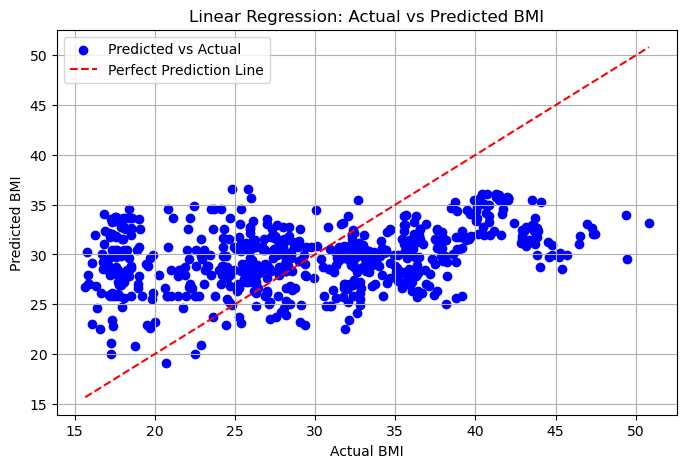

In [60]:
# Plot actual vs predicted BMI values
plt.figure(figsize=(8, 5))
plt.scatter(y_test_b, y_pred_b, color='blue', label="Predicted vs Actual")
plt.plot([y_test_b.min(), y_test_b.max()], [y_test_b.min(), y_test_b.max()], 
         color='red', linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Linear Regression: Actual vs Predicted BMI")
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# Logistic Modeling
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [65]:
scaler = MinMaxScaler()
numerical_columns = ['Age', 'Height', 'Weight', 'Number of Meals', 'Daily Water Intake', 'Time Using Technology']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [67]:
# All features for baseline model
X_all = df.drop('Obesity Level', axis=1)
y = df['Obesity Level']

# Physical activity–focused features for experiment 2
X_phys = df[['Vegetable Consumption', 'Number of Meals', 'Food Between Meals',
             'Physical Activity Frequency']]

# Physical + Demographic features for experiment 3
X_demo_phys = df[['Gender', 'Age', 'Physical Activity Frequency', 'Time Using Technology']]

# Experiment 4: Drop low-correlation features
X_sel = df.drop(['SMOKE', 'Food Between Meals', 'Obesity Level'], axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

In [69]:
# Experiment 1: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [71]:
# Experiment 2: SVM
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_phys, y, test_size=0.3, random_state=42)
svm = SVC(kernel='linear')
svm.fit(X_train2, y_train2)
y_pred_svm = svm.predict(X_test2)

In [72]:
# Experiment 3: Logistic Regression
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_demo_phys, y, test_size=0.3, random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train3, y_train3)
y_pred_lr = lr.predict(X_test3)

In [74]:
# Experiment 4: Gradient Boosting
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_sel, y, test_size=0.2, random_state=42)
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=5)
gb.fit(X_train4, y_train4)
y_pred_gb = gb.predict(X_test4)

In [76]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("SVM", y_test2, y_pred_svm)
evaluate_model("Logistic Regression", y_test3, y_pred_lr)
evaluate_model("Gradient Boosting", y_test4, y_pred_gb)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.97      1.00      0.98        62
           2       1.00      0.99      0.99        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       1.00      0.98      0.99        56
           6       1.00      1.00      1.00        50

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423

Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 77  1  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 55  0]
 [ 0  0  0  0  0  0 50]]
Accuracy: 0.9929078014184397

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        86
           1

C:\Users\cason\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cason\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cason\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


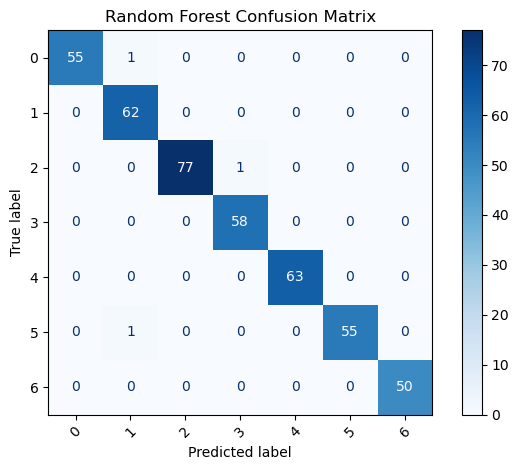

In [80]:
# 5. Confusion Matrix for Random Forest
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues', xticks_rotation=45)
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

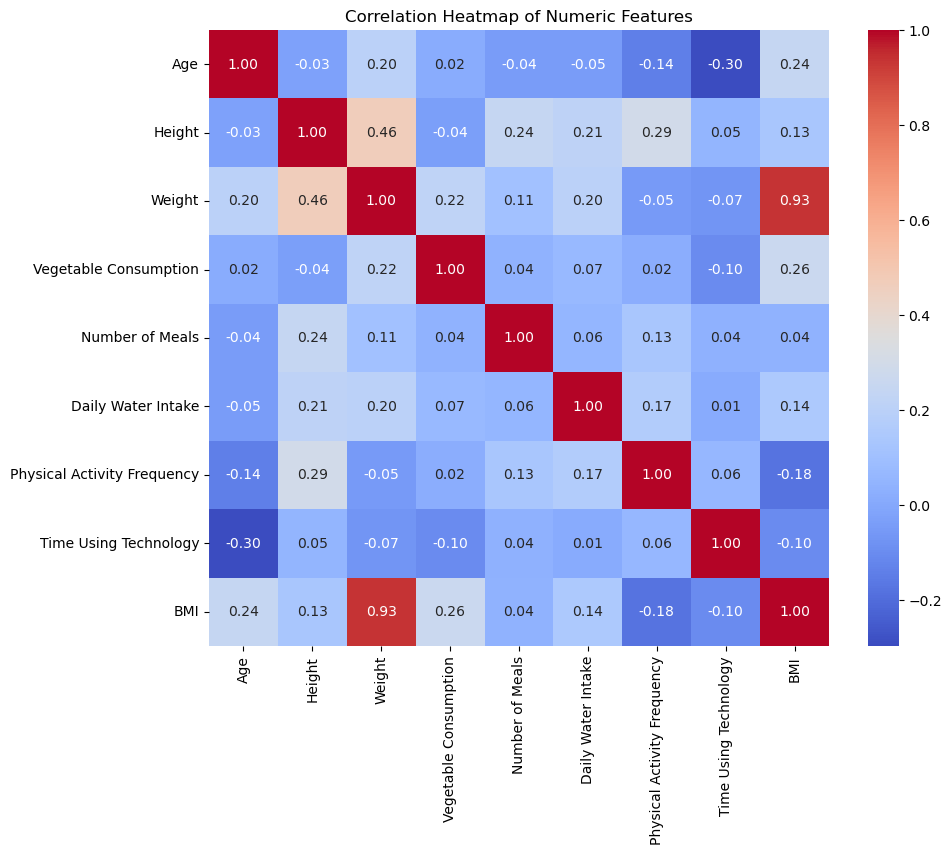

In [81]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.savefig("correlation_excluding_obesity3.png")
plt.show()